In [1]:
%load_ext autoreload
%autoreload 2

# Mapping TissueTag annotations to traget object

### This notebook illustrates how to migrate TissueTag annotations to visium spot space in the form of an AnnData object but can also be used to match annotations to any type of spatial data in the form of a pandas DF

1) We will load the TissueTag annotated image of the visium dataset and translate the pixel level annotations to an hexagonal binned grid.
2) we will measure the minimal euclidean distances to the annotations and calculate 2 types of biological axes(OrganAxis).
3) Finally we will migrate annotations to visium space and print some plots.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
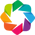

In [2]:
import os
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure
import tissue_tag as tt
import tissue_tag.annotation
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore', category=DeprecationWarning)

# Part 1 - Load annotation names and colors 

In [3]:
# set path
path_to_tissue_tag = ".."
path = path_to_tissue_tag + '/data/tissue_tag_minimal_example_visium/' 

In [4]:
from PIL import Image

# load tissue annotations from TissueTag and migrate annotation to a15um hexagonal grid and outputs the coordinates in ppm=1
tt_object = tt.load_annotation(file_path=path + '/tissue_annotations/annotations.h5')

# Use existing annotation from Nadav
tt_object.label_image = np.array(Image.open(path + '/tissue_annotations/annotations.tif'))

tt_object.grid = tt.generate_grid_from_annotation(tt_object, spot_to_spot = 15)
tt_object.grid.info()

> loaded image - size - (3957, 3886, 4)
> loaded ppm: 0.5
> loaded label image - size - (3957, 3886)
> loaded annotation map:
{'unassigned': 'yellow', 'Medulla': 'green', 'Cortex': 'cyan', 'Edge': 'brown', 'HS': 'magenta', 'Vessels': 'blue', 'PVS': 'red', 'Other': 'orange'}
> loaded positions
Generating grid with spacing - 15, from annotation resolution of - 0.5 ppm
<class 'pandas.core.frame.DataFrame'>
Index: 312970 entries, 0 to 312969
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   x                  312970 non-null  float64
 1   y                  312970 non-null  float64
 2   annotation         312970 non-null  object 
 3   annotation_number  312970 non-null  uint8  
dtypes: float64(2), object(1), uint8(1)
memory usage: 9.8+ MB


In [5]:
tt_object.grid['annotation'].value_counts()

annotation
unassigned    174617
Edge           85577
Cortex         26544
HS             16058
Medulla         5200
Unknown         2653
Other           1360
Vessels          921
PVS               40
Name: count, dtype: int64

In [10]:
import scanpy as sc
adata = sc.read_visium(path, count_file='raw_feature_bc_matrix.h5')

/var/folders/20/gn3rx00s4cqbr_7_trp61mdr0000gq/T/ipykernel_60435/1589800799.py:2: FutureWarning: Use `squidpy.read.visium` instead.
  adata = sc.read_visium(path, count_file='raw_feature_bc_matrix.h5')
/Users/ay334/Repositories/TissueTag/.venv3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/ay334/Repositories/TissueTag/.venv3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [7]:
tissue_tag.annotation.assign_annotation_to_positions(tt_object)
tt_object.positions

in_tissue  array_row  array_col  pxl_row_in_fullres  \
barcode                                                                   
GTATTCTTACCGTGCT-1        1.0        7.0       21.0         1201.223867   
GCGGTAACCCAAATGA-1        1.0        7.0       23.0         1201.431955   
CTACGTGTTGCCACCA-1        1.0        6.0       24.0         1114.670502   
CTAGATAAACTCCTCG-1        1.0        7.0       25.0         1201.640043   
TCCATTAGTTGGATAG-1        1.0        6.0       26.0         1114.878590   
...                       ...        ...        ...                 ...   
CTTGATGACCATCCAG-1        1.0       70.0       98.0         6681.761537   
CTTGCCCACCCACGCA-1        1.0       70.0      100.0         6681.969625   
GGACAACCATGAAGCC-1        1.0       70.0      102.0         6682.177713   
AGGTGCACGTCCACAT-1        1.0       70.0      104.0         6682.385801   
ACCAAGTCATCGGCAG-1        1.0       70.0      106.0         6682.593889   

                    pxl_col_in_fullres      pxl_col      pxl_row annotation  
barcode                                                                      
GTATTCTTACCGTGCT-1         1785.576318   892.788159   600.611934         HS  
GCGGTAACCCAAATGA-1         1885.151243   942.575622   600.715978       Edge  
CTACGTGTTGCCACCA-1         1934.995412   967.497706   557.335251         HS  
CTAGATAAACTCCTCG-1         1984.726168   992.363084   600.820021       Edge  
TCCATTAGTTGGATAG-1         2034.570337  1017.285168   557.439295    Medulla  
...                                ...          ...          ...        ...  
CTTGATGACCATCCAG-1         5615.638450  2807.819225  3340.880769         HS  
CTTGCCCACCCACGCA-1         5715.213375  2857.606687  3340.984813    Medulla  
GGACAACCATGAAGCC-1         5814.788300  2907.394150  3341.088857    Medulla  
AGGTGCACGTCCACAT-1         5914.363225  2957.181612  3341.192900    Medulla  
ACCAAGTCATCGGCAG-1         6013.938150  3006.969075  3341.296944         HS  

[2958 rows x 8 columns]

In [11]:
cell_annotation = tt_object.positions["annotation"].to_dict()
adata.obs["annotation"] = adata.obs.apply(lambda r:cell_annotation.get(r.name, None), axis=1)

In [12]:
adata.obs["annotation"].value_counts(dropna=False)

annotation
None          2034
Edge          1893
Cortex         599
HS             278
Medulla         95
Unknown         29
Other           27
Vessels         26
unassigned      11
Name: count, dtype: int64

/var/folders/20/gn3rx00s4cqbr_7_trp61mdr0000gq/T/ipykernel_60435/3737155273.py:3: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(adata,color=['annotation'] ,cmap='gist_rainbow')


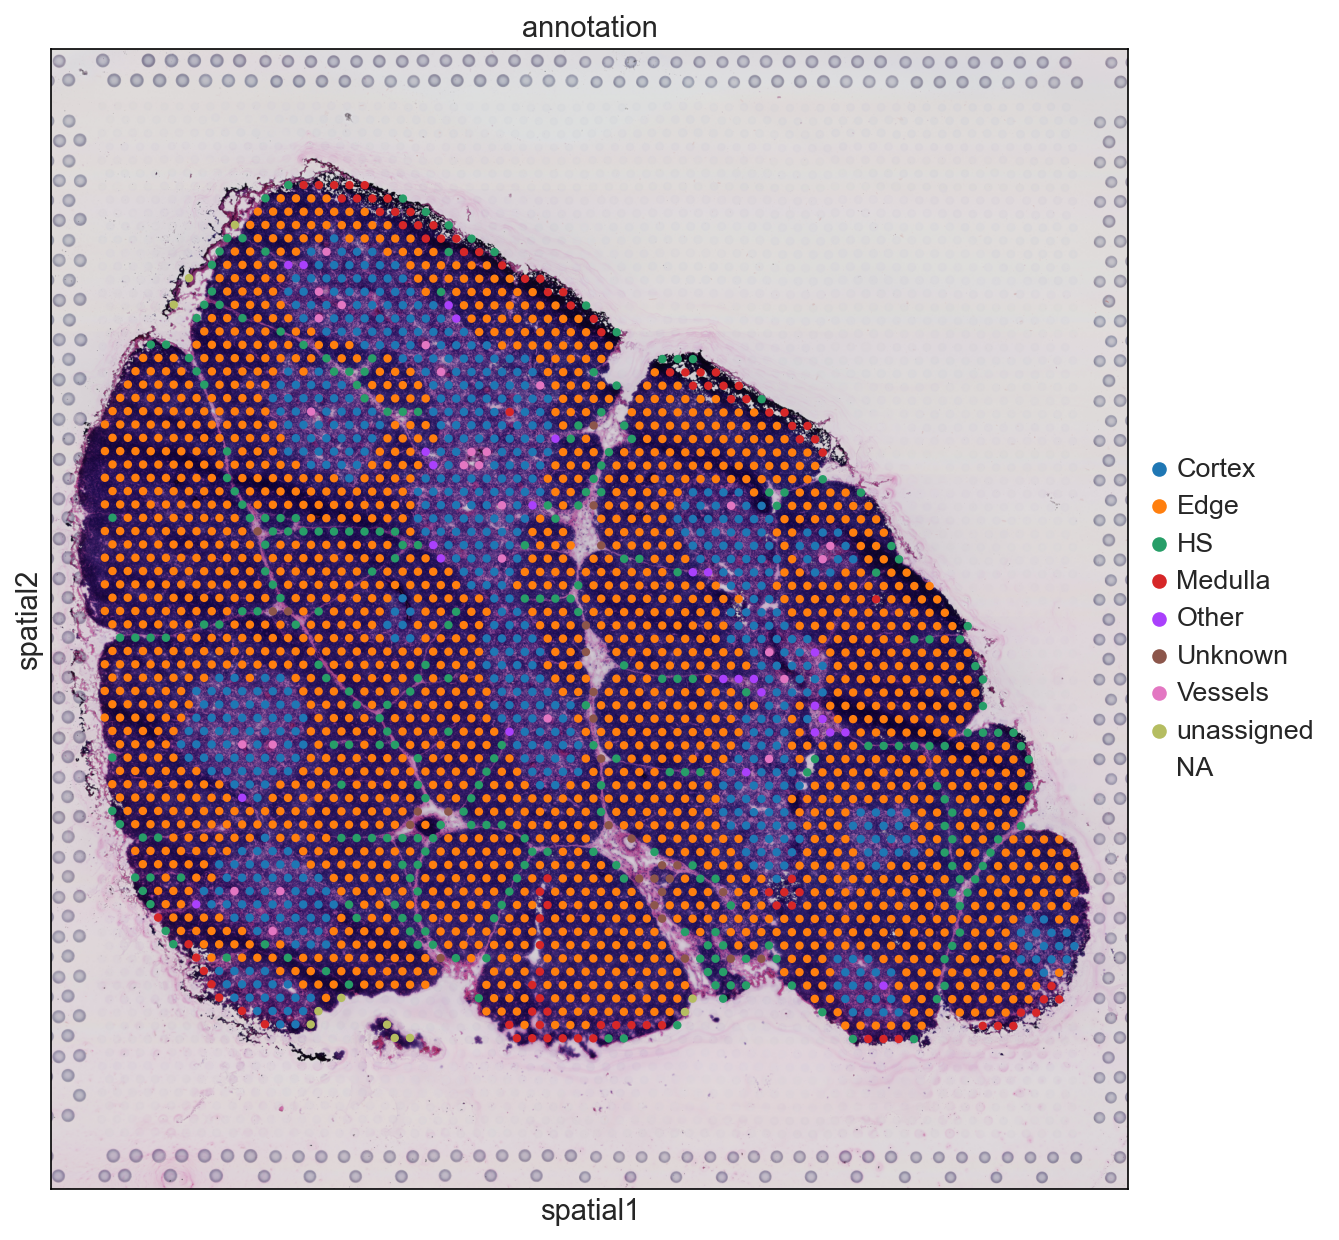

In [13]:
# plot the newly annotated visium AnnData
sc.set_figure_params(figsize=[10,10],dpi=75)
sc.pl.spatial(adata,color=['annotation'] ,cmap='gist_rainbow')

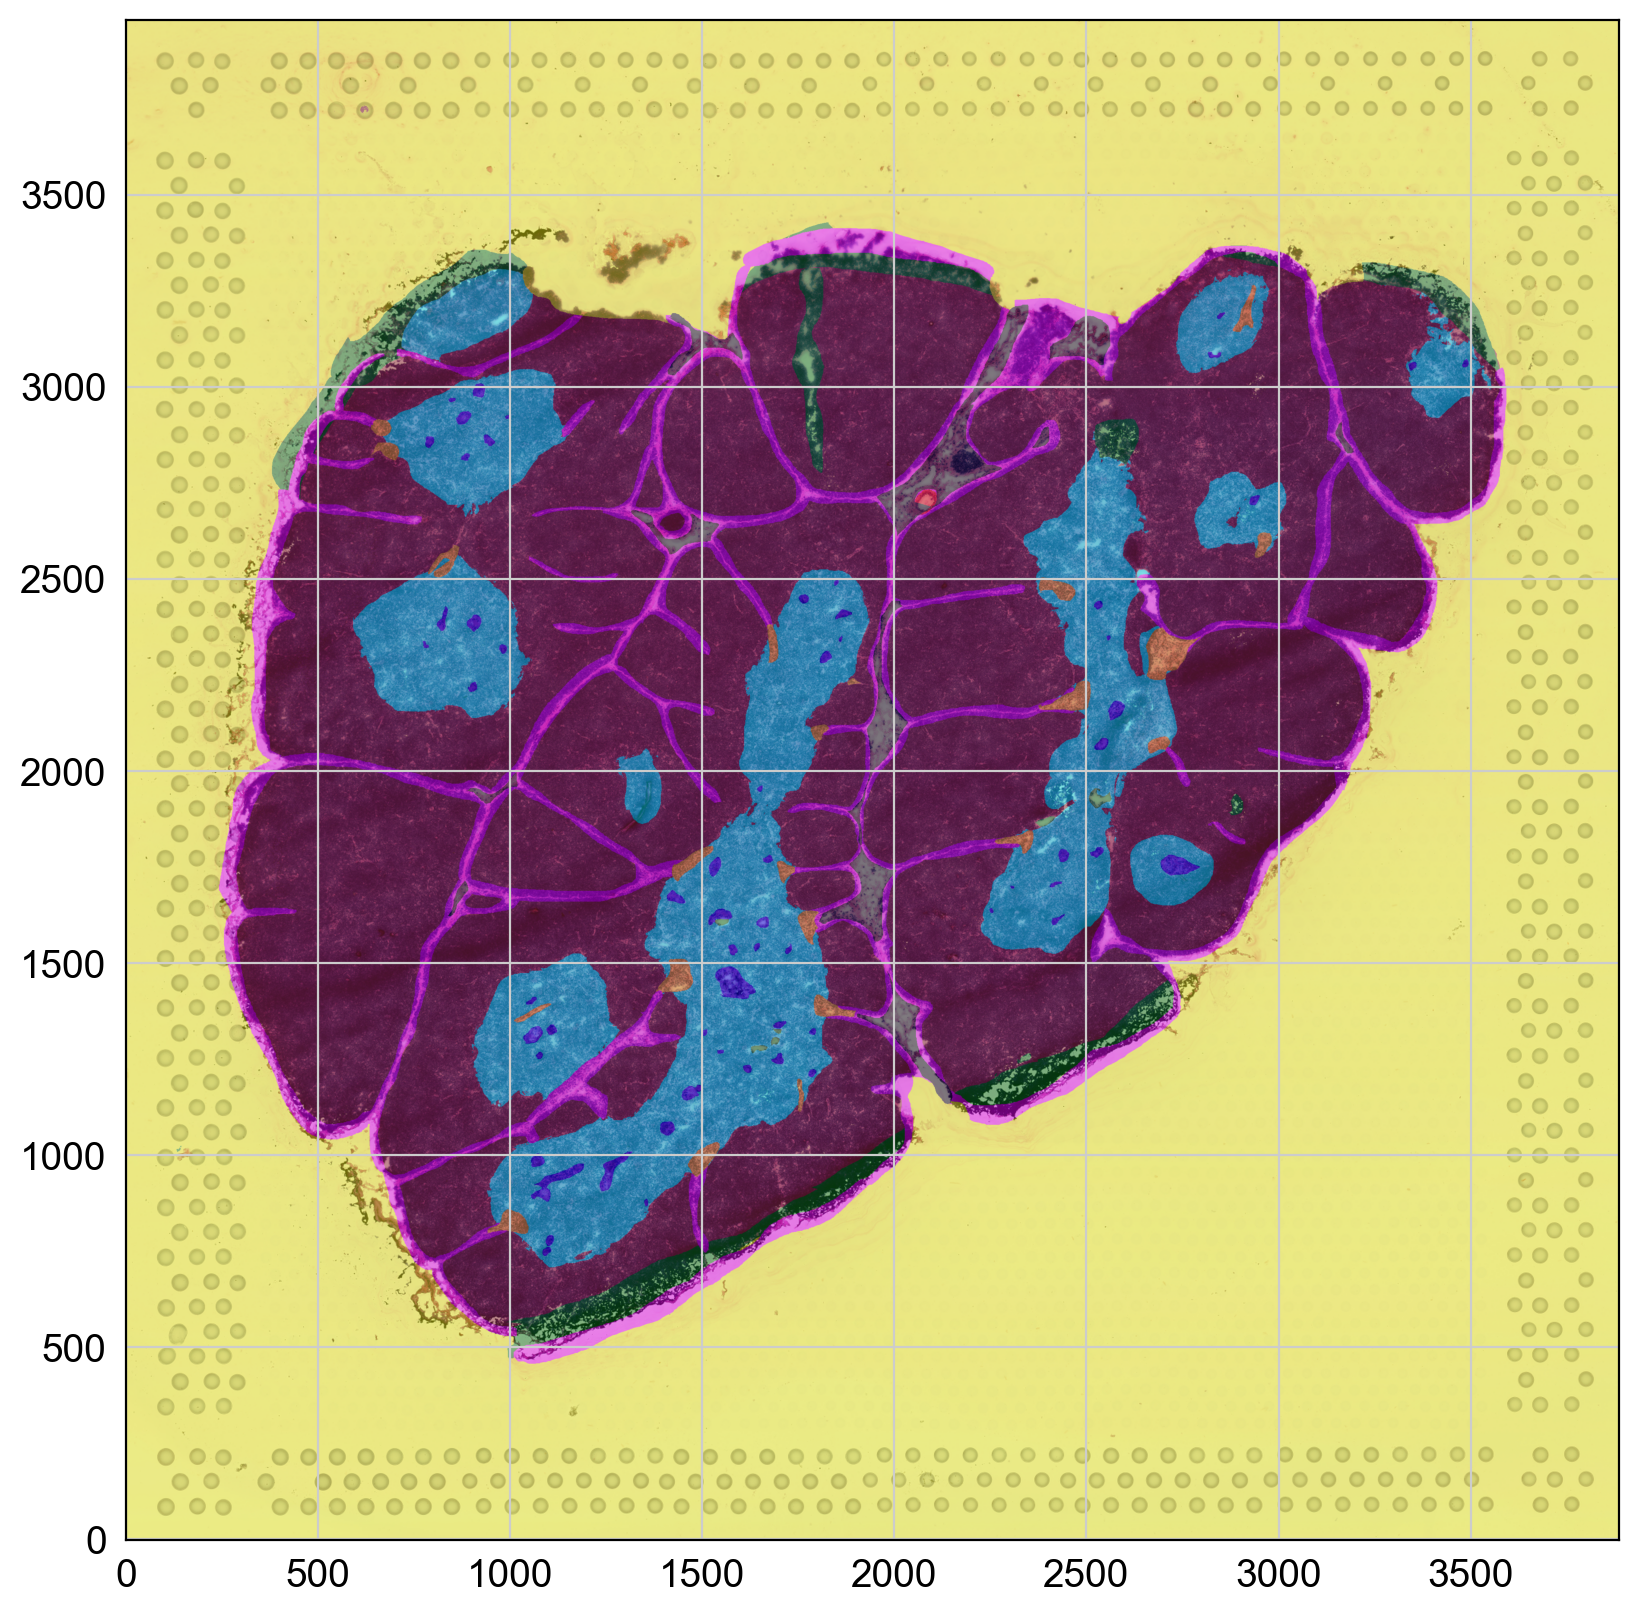

In [14]:
tissue_tag.annotation.plot_labels(tt_object, alpha=0.6)